In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame, GeoSeries
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim


%matplotlib inline
pd.options.mode.chained_assignment = None


In [40]:
df = pd.read_csv("flower_input.csv", delimiter = ";")
df['Straatnaam'] = df['Straatnaam'].astype(str)
df['Huisnummer'] = df['Huisnummer'].astype(str)
df['Postcode'] = df['Postcode'].astype(str).str.replace(' ', '')
df['Woonplaats'] = df['Woonplaats'].astype(str)
df['Address'] = df[['Straatnaam', 'Huisnummer', 'Postcode', 'Woonplaats']].agg(' '.join, axis=1)
df['Address'] = df['Address'].str.replace('nan ', '')
geolocator = Nominatim(user_agent="tulip_hackathon")
df['Longitude'] = 0
df['Latitude'] = 0
for index, row in df.iterrows():
    location = geolocator.geocode(row["Address"], timeout=10)       
    df.loc[index, 'Longitude'] = float(location.longitude)
    df.loc[index, 'Latitude'] = float(location.latitude)
    
df


,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats,Address,Longitude,Latitude
0,Company,NaN,NaN,Itility,Flight Forum,3360,NaN,5657EW,Eindhoven,Flight Forum 3360 5657EW Eindhoven,5.404500,51.450187
1,Mevr.,N.J.,NaN,Verheggen,Venuslaan,97,NaN,5632HB,Eindhoven,Venuslaan 97 5632HB Eindhoven,5.488001,51.468241
2,Mevr.,M.H.C.,NaN,Verheijen,Imkerstraat,244,NaN,5623DK,Eindhoven,Imkerstraat 244 5623DK Eindhoven,5.473166,51.454618
3,Dhr. en mevr.,NaN,NaN,Vermeulen,Antwerpenlaan,25,NaN,5628XC,Eindhoven,Antwerpenlaan 25 5628XC Eindhoven,5.477722,51.480267
4,Mevr.,G.,NaN,Verschuren,Venuslaan,711,NaN,5632HV,Eindhoven,Venuslaan 711 5632HV Eindhoven,5.489439,51.475132
...,...,...,...,...,...,...,...,...,...,...,...,...
105,Mevr.,NaN,NaN,Veldpaus,Luipaardstraat,82,NaN,5645CW,Eindhoven,Luipaardstraat 82 5645CW Eindhoven,5.505869,51.421031
106,Mevr.,NaN,NaN,Veth,Roostenlaan,89,NaN,5644GB,Eindhoven,Roostenlaan 89 5644GB Eindhoven,5.492484,51.420338
107,Mevr.,NaN,NaN,Vloet,Permekestraat,42,NaN,5643VX,Eindhoven,Permekestraat 42 5643VX Eindhoven,5.507935,51.428513
108,Mevr. + Dhr.,NaN,NaN,Wiel,Gentiaanweg,15,NaN,5643CA,Eindhoven,Gentiaanweg 15 5643CA Eindhoven,5.498468,51.422284


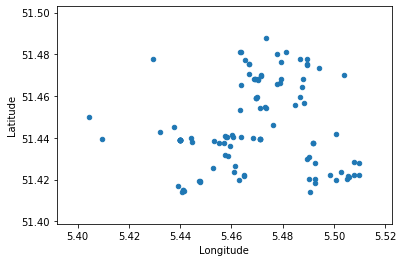

In [41]:
df.plot.scatter(x="Longitude" , y="Latitude")

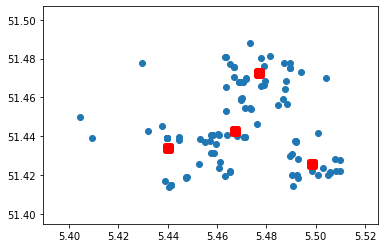

In [42]:
#installed from https://github.com/joshlk/k-means-constrained
from k_means_constrained import KMeansConstrained
df_locations = df[["Longitude", "Latitude"]]
clf = KMeansConstrained(n_clusters=4, size_min=2, size_max=30)
pred = clf.fit_predict(df_locations)

plt.scatter(x='Longitude', y = 'Latitude', data=df)
centroids = clf.cluster_centers_
plt.scatter(x=centroids[:,0], y = centroids[:,1], c='red', marker='s',
    linewidths=5)


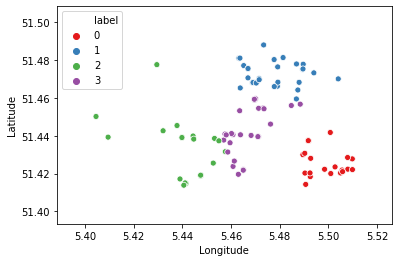

In [43]:
df["label"] = pred
sns.scatterplot(x='Longitude', y = 'Latitude',hue='label', data=df, palette='Set1')

In [44]:
df["Toevoeging"].value_counts()

a           3
app. 251    1
app. 429    1
app. 1      1
Apt. 514    1
app. 305    1
app. 323    1
app.143     1
app. 217    1
app. 337    1
app. 341    1
28          1
app. 5      1
Name: Toevoeging, dtype: int64

In [45]:
df.dropna(subset=["Toevoeging"])

,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats,Address,Longitude,Latitude,label
7,Mevr.,I.,NaN,Vogels,Ds. Theodor Fliednerstr.,5,Apt. 514,5631BM,Eindhoven,Ds. Theodor Fliednerstr. 5 5631BM Eindhoven,5.488455,51.456701,3
61,Mevr.,Kersten,NaN,NaN,Schouwbroekseweg,10,a,5616NW,Eindhoven,Schouwbroekseweg 10 5616NW Eindhoven,5.460799,51.440593,3
62,Dhr.,M.,v.d.,Heuvel,Strijpsestraat,144,28,5616GT,Eindhoven,Strijpsestraat 144 5616GT Eindhoven,5.457518,51.440896,3
79,Mevr.,R.,NaN,Deckers,Tilburgseweg West,36,a,5652NM,Eindhoven,Tilburgseweg West 36 5652NM Eindhoven,5.437802,51.445402,2
82,Mevr.,M.,van,Orten,Zeelsterstraat,93,a,5652EC,Eindhoven,Zeelsterstraat 93 5652EC Eindhoven,5.444673,51.438228,2
83,Mevr.,NaN,v.d.,Boogaard,Bredalaan,77,app. 429,5652JB,Eindhoven,Bredalaan 77 5652JB Eindhoven,5.439821,51.439058,2
84,Mevr.,NaN,NaN,Broeren-Smulders,Bredalaan,77,app. 323,5652JB,Eindhoven,Bredalaan 77 5652JB Eindhoven,5.439821,51.439058,2
85,Mevr.,NaN,van,Bussel-Vinken,Bredalaan,77,app.143,5652JB,Eindhoven,Bredalaan 77 5652JB Eindhoven,5.439821,51.439058,2
86,Mevr.,NaN,NaN,Doomen-v.d. Weijdeven,Bredalaan,77,app. 251,5652JB,Eindhoven,Bredalaan 77 5652JB Eindhoven,5.439821,51.439058,2
87,Mevr.,W.,de,Greef,Bredalaan,77,app. 5,5652JB,Eindhoven,Bredalaan 77 5652JB Eindhoven,5.439821,51.439058,2


In [46]:
df.sort_values(by='Postcode')

,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats,Address,Longitude,Latitude,label
65,Mevr.,NaN,v.d.,Brand,Maria van Bourgondielaan,296,NaN,5216EE,Eindhoven,Maria van Bourgondielaan 296 5216EE Eindhoven,5.458672,51.431388,3
42,Dhr. en mevr.,L.M.P.,de,Turck,Lichtstraat,280,NaN,5611XE,Eindhoven,Lichtstraat 280 5611XE Eindhoven,5.471009,51.439427,3
64,Mevr.,NaN,v.d,Horst-Sneijers,Lichtstraat,334,NaN,5611XH,Eindhoven,Lichtstraat 334 5611XH Eindhoven,5.471062,51.439539,3
63,Mevr.,NaN,van,Doremalen,Lichtstraat,368,NaN,5611XH,Eindhoven,Lichtstraat 368 5611XH Eindhoven,5.471118,51.439575,3
51,Mevr.,D.,NaN,Vos-Lukken,Lichtstraat,350,NaN,5611XH,Eindhoven,Lichtstraat 350 5611XH Eindhoven,5.471304,51.439546,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,Mevr.,M.,NaN,Verhagen,Mensinge,9,NaN,5655HT,Eindhoven,Mensinge 9 5655HT Eindhoven,5.441310,51.415030,2
49,Mevr.,J.M.M.,NaN,Vogels-van Wijne,Mensinge,45,NaN,5655HV,Eindhoven,Mensinge 45 5655HV Eindhoven,5.441120,51.415079,2
46,Mevr.,M.T.,NaN,Verstraaten,Mensinge,75,NaN,5655HW,Eindhoven,Mensinge 75 5655HW Eindhoven,5.441489,51.414761,2
0,Company,NaN,NaN,Itility,Flight Forum,3360,NaN,5657EW,Eindhoven,Flight Forum 3360 5657EW Eindhoven,5.404500,51.450187,2
